# Banana Agent Project
---

This notebook is for training an agent using a deep Q network algorithm as part of the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Setting up the Environment
----

Firstly we will set up the Unity banana collection environment. Please make sure you are running a Python 3.6 kernel for this notebook. 


In [1]:
import sys
if not (sys.version_info[0] == 3 and sys.version_info[1] == 6):
    raise Exception("This notebook must be run with Python 3.6 to allow unityagents package to work correctly.")

from unityagents import UnityEnvironment
from dqn_banana_agent import DQNAgent, train_agent, load_agent, test_agent, criterion_check

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


device =  cpu


To load the environment please download the correct Unity environment for your OS using the following links. 

- Linux: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Linux.zip)
- Linux (Headless): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Linux_NoVis.zip)
- Mac OSX: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana.app.zip)
- Windows (32-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86.zip)
- Windows (64-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86_64.zip)

Once downloaded change the `path` variable to match the location of the environment that you downloaded.

<strong>Note: only run the following cell once. If the Unity environment has been closed or crashed please restart the kernel. <strong/>
    

In [2]:
path = "Banana.app"
env = UnityEnvironment(file_name=path)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Training Model
-----

In this section you are able to train a model from scratch using different hyperparameters and neural architectures. To continue training a saved model skip to the last cell of this section after reloading you model.


In [ ]:
# Collecting parameter infomation from the Unity environment
brain_name = env.brain_names[0]
env_info = env.reset(train_mode=True)[brain_name]
brain = env.brains[brain_name]


The next cells allows you to define hyperparameters and create your model.

Note: The numbers commented next to each parameter were what I used to solve the banana collection problem.

In [ ]:
# Agent hyperparameters
buffer_size=20000 #2000
seed=10 #10

state_size = env_info.vector_observations.shape[1]
action_size =  brain.vector_action_space_size
hidden_layers=[64,32,16] #[64,32,16]

epsilon=1 #1
epsilon_decay=0.99995 #0.99995
epsilon_min=0.02 #0.02

gamma=0.95 #0.95
tua = 0.001 #0.001
learning_rate=0.001 #0.001
update_frequency = 5 #5


In [ ]:
#Creates agent with above hyperparameters.
agent =  DQNAgent(buffer_size, seed, state_size, action_size,
                 hidden_layers, epsilon, epsilon_decay, epsilon_min,
                 gamma, tua, learning_rate, update_frequency)

Finally this cell allows to train a new or loaded model.

In [ ]:
# Commence training proccess
save_path = ""  # choose a path to save the best and final models, leave blank for current dir.
save_name = "New_model.pth" # choose a name for the model (eg DQNagent.pth)
print_every = 100
scores = train_agent(env,agent,1000,32,save_name,save_path,print_every)
print(scores)

### 3. Loading Saved Model
----

Use this section to reload a previously saved model.


In [3]:
agent_path = "Trained_agent_best.pth" # Trained_agent_best.pth is the agent I trained to solve the enviroment
agent = load_agent(agent_path)


Agent loaded with parameters: 
 {'buffer_size': 20000, 'seed': 10, 'replay_buffer': <dqn_banana_agent.ReplayBuffer object at 0x12ac5a3c8>, 'state_size': 37, 'action_size': 4, 'hidden_layers': [64, 32, 16], 'Q_net': QNetwork(
  (input): Linear(in_features=37, out_features=64, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=16, bias=True)
  )
  (output): Linear(in_features=16, out_features=4, bias=True)
), 'target_Q': QNetwork(
  (input): Linear(in_features=37, out_features=64, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=16, bias=True)
  )
  (output): Linear(in_features=16, out_features=4, bias=True)
), 'optimizer': Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), 'epsilon': 0.02, 'epsilon_decay': 0.99995, 'epsilon_min'

### 4. Model Testing
----

The next cell will run the agent in evaluation mode and save the episode scores. If you would like to watch the agents actions set `quick_view` to `False`.

In [4]:
quick_view = True
print_scores = False
test_episode_number = 1000
test_scores = test_agent(env, agent, test_episode_number, print_scores, quick_view)

Average reward over 1000 tests was 13.785 with a SD of 4.389621282069787


### 5. Model Evaluation
----
In this section we will create a graph to evaluate the models training process and how it preforms during training as well as checking if the environment has been solved.
The following cell closes the unity environment (as this can cause a kernel crash while plotting), converts the agent's training scores into a Panda series for easy of analysis and increase plot size.

In [5]:
env.close()
train_scores = pd.Series(agent.training_scores)
plt.rcParams['figure.dpi'] = 150

This cell plots both episode score and a rolling average for training rewards of the trained agent.

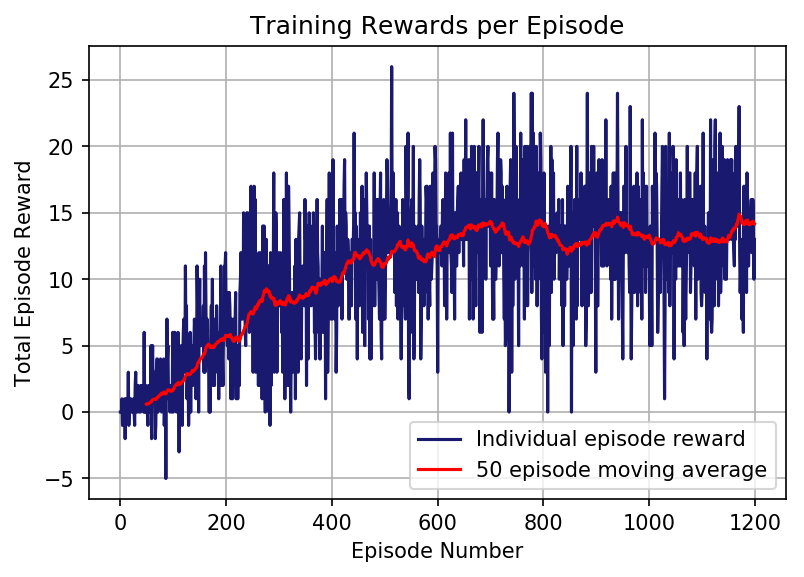

In [6]:
plt.title("Training Rewards per Episode")
plt.plot(train_scores,label = "Individual episode reward",color="midnightblue")
plt.plot(train_scores.rolling(50).mean(), label = "50 episode moving average", color="r")
plt.grid(True)
plt.xlabel("Episode Number")
plt.ylabel("Total Episode Reward")
plt.legend()
plt.show()

The final cell calculates the episode on which the >=13 reward over 100 episodes criteria was achieved and plots a graphs avergaed over  

Criterion passed on episode 653.


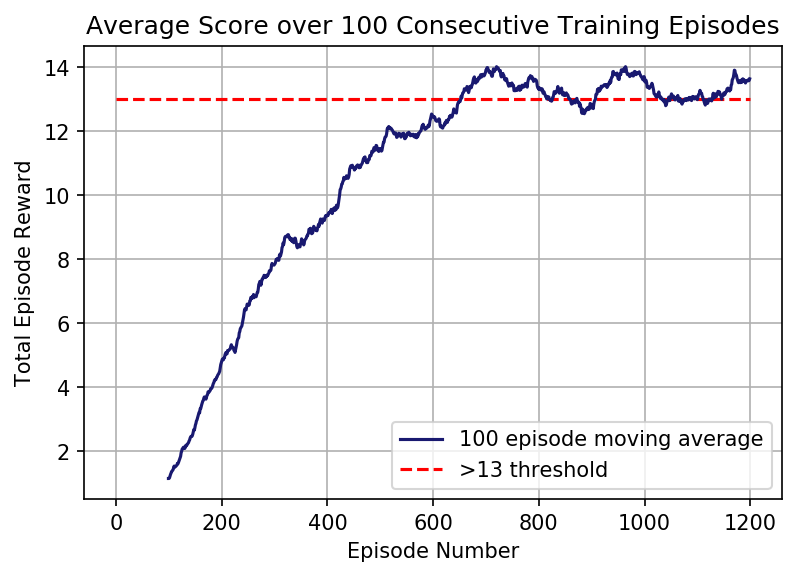

In [7]:
passed = criterion_check(agent)
plt.title("Average Score over 100 Consecutive Training Episodes")
plt.plot(train_scores.rolling(100).mean(), label="100 episode moving average", color="midnightblue")
plt.hlines(13,0,len(train_scores),label=">13 threshold",linestyle="--",color="r")
plt.grid(True)
plt.xlabel("Episode Number")
plt.ylabel("Total Episode Reward")
plt.legend()
plt.show()
